# EDA - Exploratory Data Analysis
En este notebook se realizará un análisis exploratorio de los datos para identificar patrones, tendencias y relaciones entre las variables del dataset.

Este primer script, carga las librerías que vamos a utilizar, y lee desde el disco el dataset que vamos a analizar.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasetcarreras.csv')
if data['fecha'].dtype == 'object':
    data['fecha'] = pd.to_datetime(data['fecha'])

print(data.head())

       fecha    nombre_carrera    hipodromo  distancia   pista estado  \
0 1991-04-07   LA GANGA (LISO)  LA ZARZUELA        900  HIERBA  BUENO   
1 1991-04-07   LA GANGA (LISO)  LA ZARZUELA        900  HIERBA  BUENO   
2 1991-04-07   LA GANGA (LISO)  LA ZARZUELA        900  HIERBA  BUENO   
3 1991-04-07   LA GANGA (LISO)  LA ZARZUELA        900  HIERBA  BUENO   
4 1991-04-07   LA GANGA (LISO)  LA ZARZUELA        900  HIERBA  BUENO   

   dotacion_ganador  puesto           nombre  peso        jockey  \
0              1803       1          CHAVYTA  53.0   F. GONZALEZ   
1              1803       2         BALDACCI  53.0     F. MARTIN   
2              1803       3             MINA  53.0  R. MARTIN V.   
3              1803       4      PALOMA ROSA  53.0  M. HERNANDEZ   
4              1803       5  PISUEŃA'S FREAK  54.0      S. VIDAL   

  distancia_caballo  valor  premio  
0                 0    0.0    1803  
1                 0    0.0     721  
2                 0    0.0     361  
3   

## Análisis Exploratorio de Datos (EDA) - Análisis Exploratorio de Datos (EDA): Estadísticas Descriptivas
En esta sección, se realizará un análisis exploratorio de los datos para identificar patrones, tendencias y relaciones entre las variables del dataset. Se calcularán estadísticas descriptivas y se visualizarán los datos para comprender mejor su distribución y comportamiento.

In [57]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119168 entries, 0 to 119167
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fecha              119168 non-null  datetime64[ns]
 1   nombre_carrera     119168 non-null  object        
 2   hipodromo          119168 non-null  object        
 3   distancia          119168 non-null  int64         
 4   pista              119168 non-null  object        
 5   estado             119168 non-null  object        
 6   dotacion_ganador   119168 non-null  int64         
 7   puesto             119168 non-null  int64         
 8   nombre             119168 non-null  object        
 9   peso               119168 non-null  float64       
 10  jockey             119163 non-null  object        
 11  distancia_caballo  119168 non-null  object        
 12  valor              119168 non-null  float64       
 13  premio             119168 non-null  int64   

In [58]:
print(data.describe())


                               fecha      distancia  dotacion_ganador  \
count                         119168  119168.000000     119168.000000   
mean   2008-06-01 08:32:28.388829184    1735.212389       5607.338061   
min              1991-04-07 00:00:00     800.000000          0.000000   
25%              2001-08-04 00:00:00    1500.000000       3000.000000   
50%              2008-09-04 00:00:00    1600.000000       4500.000000   
75%              2016-01-03 00:00:00    2000.000000       5500.000000   
max              2024-04-19 00:00:00    4000.000000     105177.000000   
std                              NaN     376.315251       5942.987374   

              puesto           peso          valor         premio  
count  119168.000000  119168.000000  119168.000000  119168.000000  
mean        6.223659      51.321685       9.175021    1014.345009  
min         1.000000       0.500000       0.000000       0.000000  
25%         3.000000      52.000000       0.000000       0.000000  
50

## Análisis Exploratorio de Datos (EDA): Distribución de Variables Numéricas
En esta sección, se visualizarán las distribuciones de las variables numéricas del dataset para comprender mejor su comportamiento y detectar posibles valores atípicos o anomalías.

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


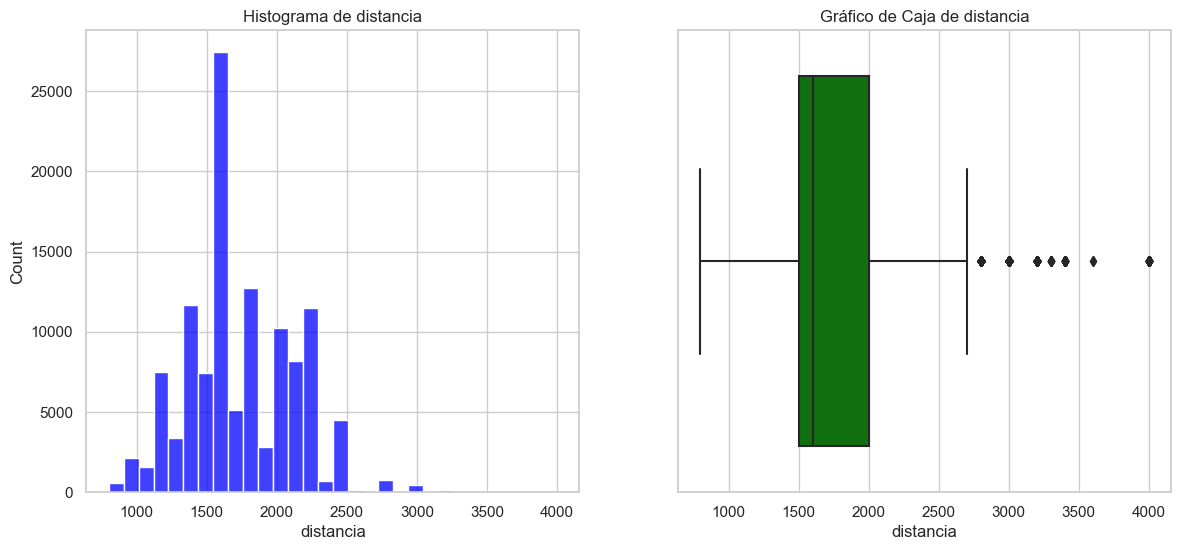

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


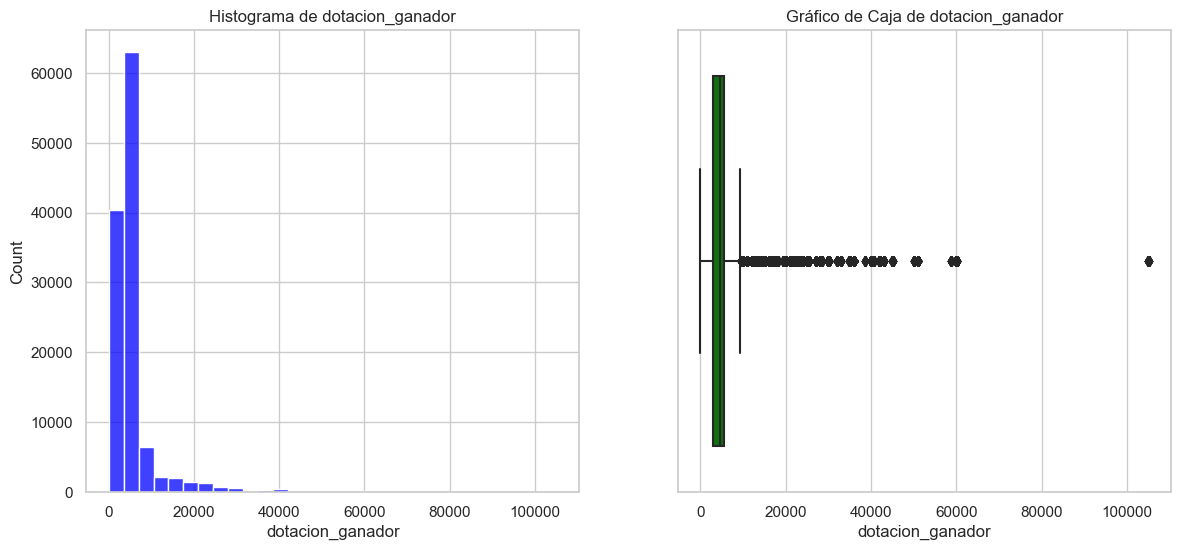

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


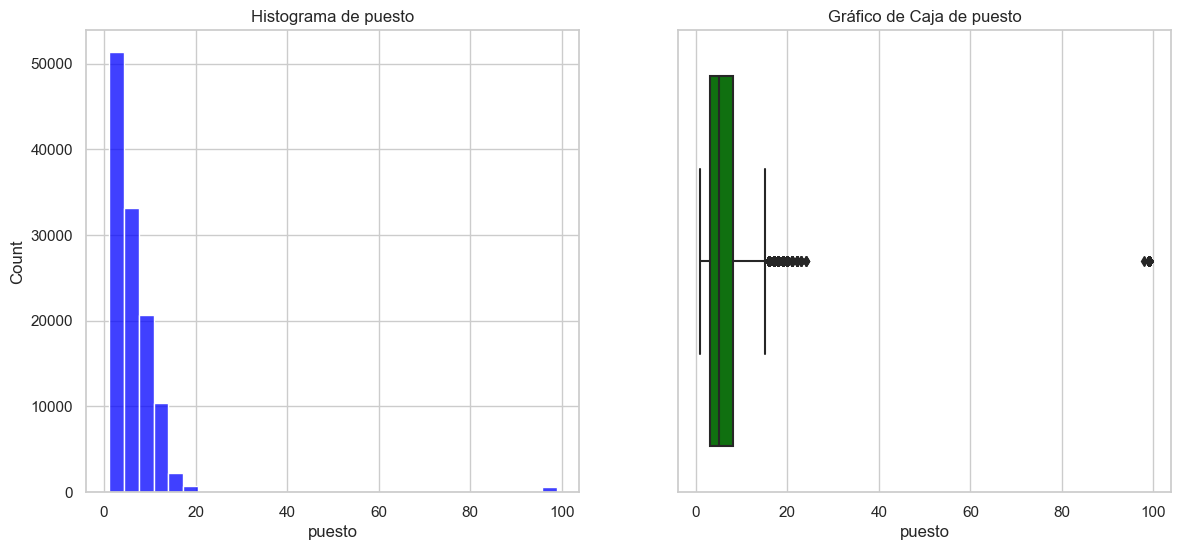

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


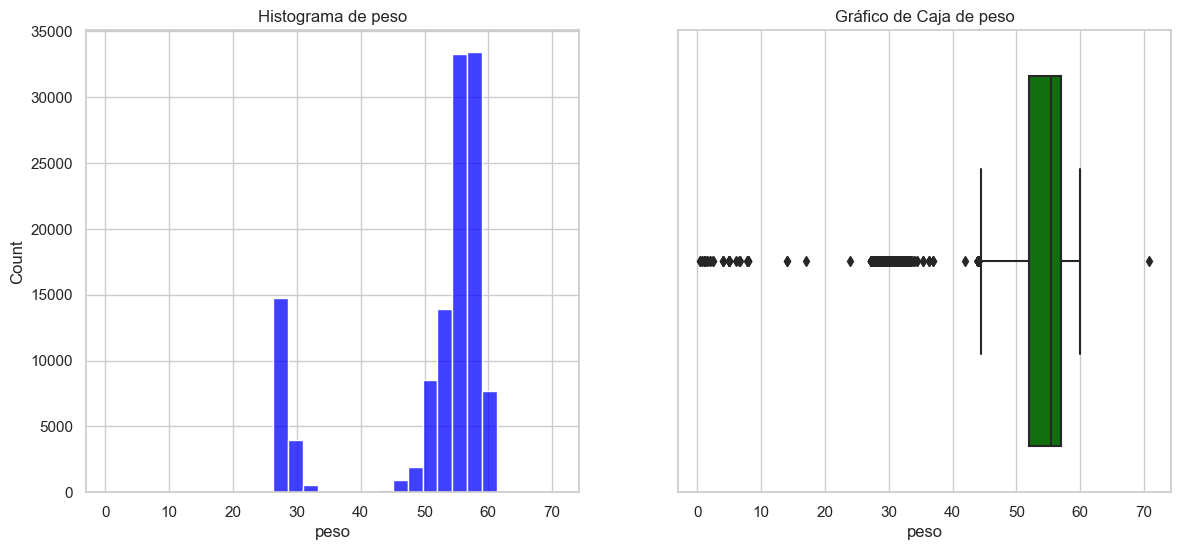

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


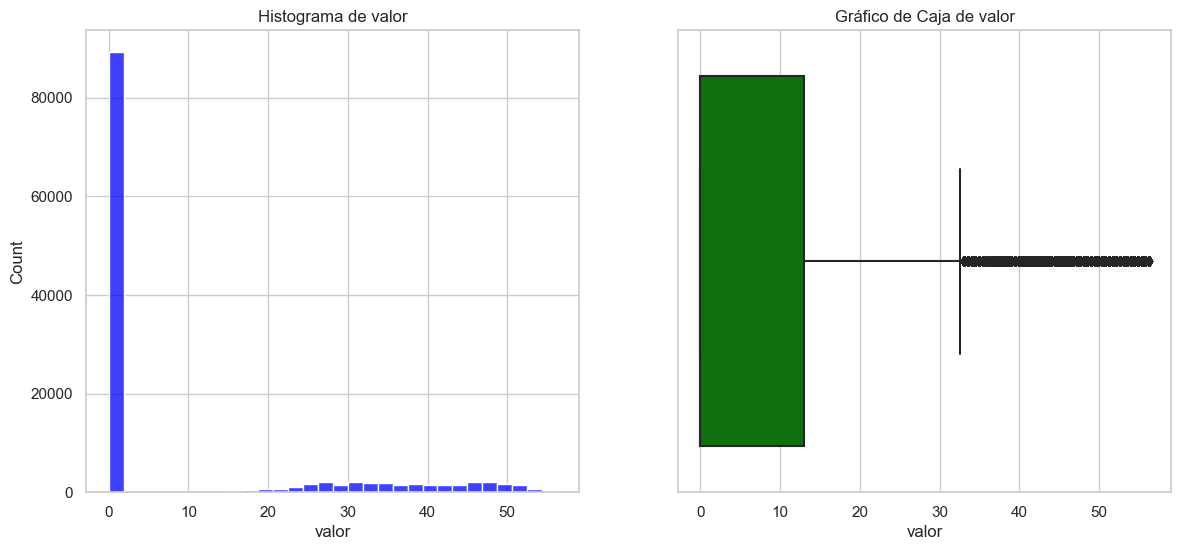

/Users/carlosdiez/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


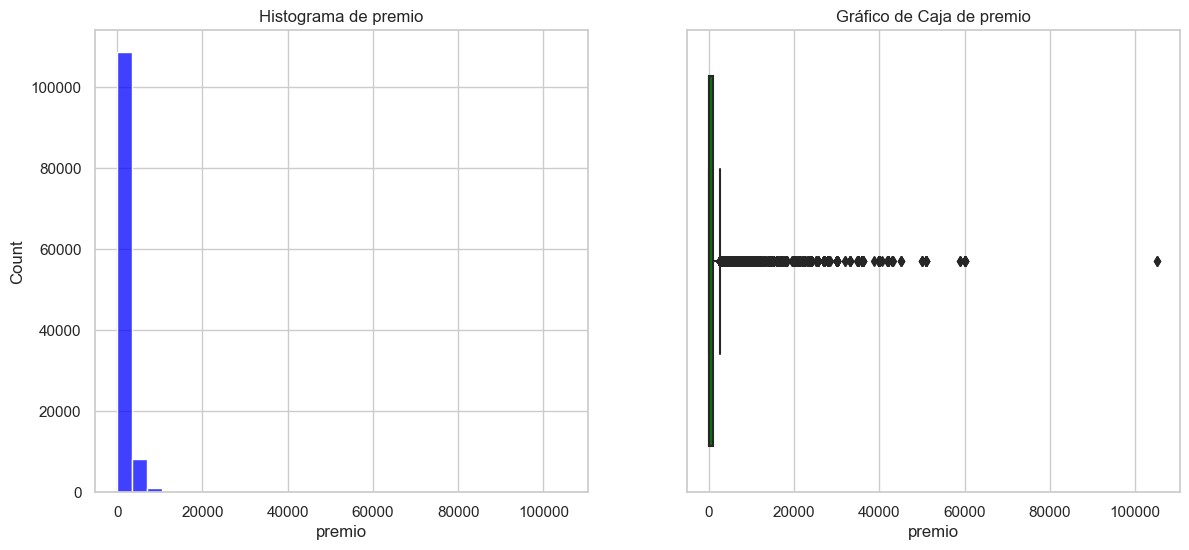

In [59]:
# Configuraciones de visualización
sns.set(style="whitegrid")

# Lista de variables numéricas
num_vars = ['distancia', 'dotacion_ganador', 'puesto', 'peso', 'valor', 'premio']

# Crear histogramas y gráficos de cajas para cada variable numérica
for var in num_vars:
    plt.figure(figsize=(14, 6))
    
    # Crear un histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], bins=30, kde=False, color='blue')
    plt.title('Histograma de ' + var)
    
    # Crear un gráfico de cajas
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='green')
    plt.title('Gráfico de Caja de ' + var)
    
    plt.show()

In [60]:

print(data['hipodromo'].value_counts())
print(data['pista'].value_counts())
print(data['distancia'].value_counts())
print(data['estado'].value_counts())
print(data['jockey'].value_counts())
print(data['distancia_caballo'].value_counts())


hipodromo
LA ZARZUELA              51939
SAN SEBASTIAN            24356
MIJAS                    13364
DOS HERMANAS             12131
SANLUCAR DE BARRAMEDA     5707
PINEDA                    4561
GRAN CANARIA              3502
ANTELA (OURENSE)          1435
VILA-SECA                  573
LAREDO                     367
LOREDO                     334
LA SENIA                   205
MANACOR                    142
OVIEDO                     137
SOMO                        91
SANTANDER                   65
RIBADESELLA                 63
NOJA                        43
ZAHARA DE LOS ATUNES        34
GUADARRAMA                  26
SUANCES                     21
BADAJOZ                     16
SON PARDO                   15
YEGUADA EL TEPEYAC          11
EL SARDINERO                 9
NAVALPERAL DE PINARES        9
EL ESPINAR                   8
VENTA DE LA RUBIA            4
Name: count, dtype: int64
pista
HIERBA    73111
ARENA     41095
FIBRA      4962
Name: count, dtype: int64
distancia
1600  

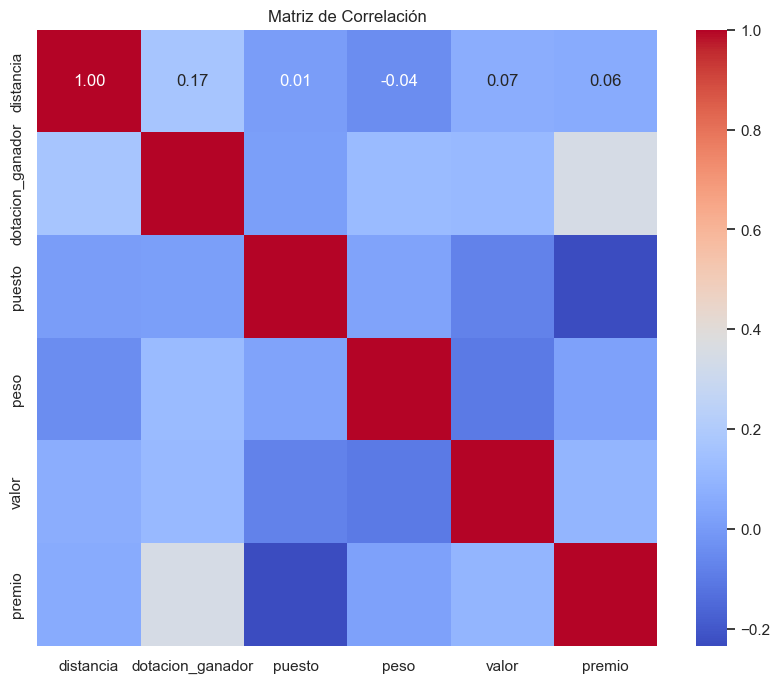

In [61]:

# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

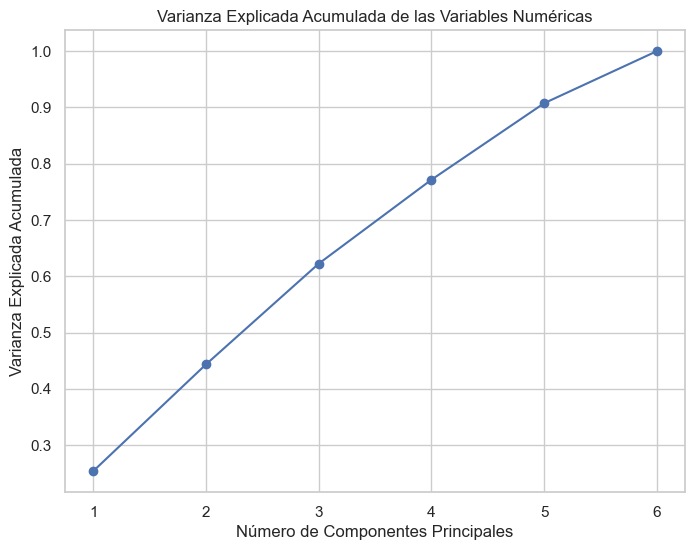

Análisis de la Carga de Variables en Componentes Principales:
                       PC1       PC2       PC3       PC4       PC5       PC6
distancia         0.287277  0.038074  0.629638 -0.600099 -0.371818  0.145641
dotacion_ganador  0.582429  0.357181  0.167904  0.150279  0.279260 -0.635953
puesto           -0.300527  0.421471  0.582224  0.350266  0.373351  0.361918
peso              0.056198  0.710849 -0.297074  0.165126 -0.594512  0.150239
valor             0.317183 -0.433540  0.267130  0.681259 -0.407496  0.099564
premio            0.619813  0.008479 -0.277072 -0.056841  0.353379  0.641002


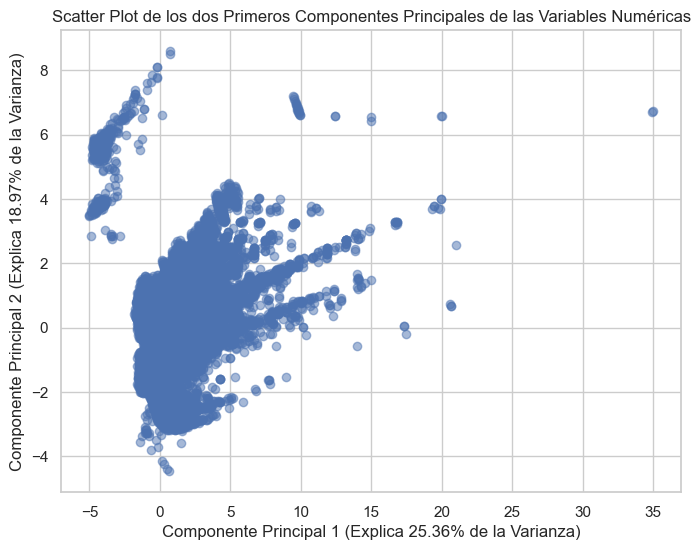

In [62]:
# Seleccionar las variables numéricas para el análisis
numeric_cols = ['distancia', 'dotacion_ganador', 'puesto', 'peso', 'valor', 'premio']

# Filtrar el dataset para seleccionar solo las columnas numéricas
numeric_data = data[numeric_cols]

# Estandarizar los datos
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Inicializar y ajustar el modelo PCA
pca = PCA()
pca.fit(numeric_data_scaled)

# Obtener los componentes principales
components = pca.components_

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Plot de la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='-')
plt.title('Varianza Explicada Acumulada de las Variables Numéricas')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Análisis de la carga de las variables en los componentes principales
loadings = pd.DataFrame(components.T, columns=['PC{}'.format(i) for i in range(1, len(numeric_cols) + 1)], index=numeric_cols)
print("Análisis de la Carga de Variables en Componentes Principales:")
print(loadings)

# Scatter plot de los dos primeros componentes principales
pca_data = pca.transform(numeric_data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Scatter Plot de los dos Primeros Componentes Principales de las Variables Numéricas')
plt.xlabel('Componente Principal 1 (Explica {:.2f}% de la Varianza)'.format(explained_variance[0]*100))
plt.ylabel('Componente Principal 2 (Explica {:.2f}% de la Varianza)'.format(explained_variance[1]*100))
plt.grid(True)
plt.show()

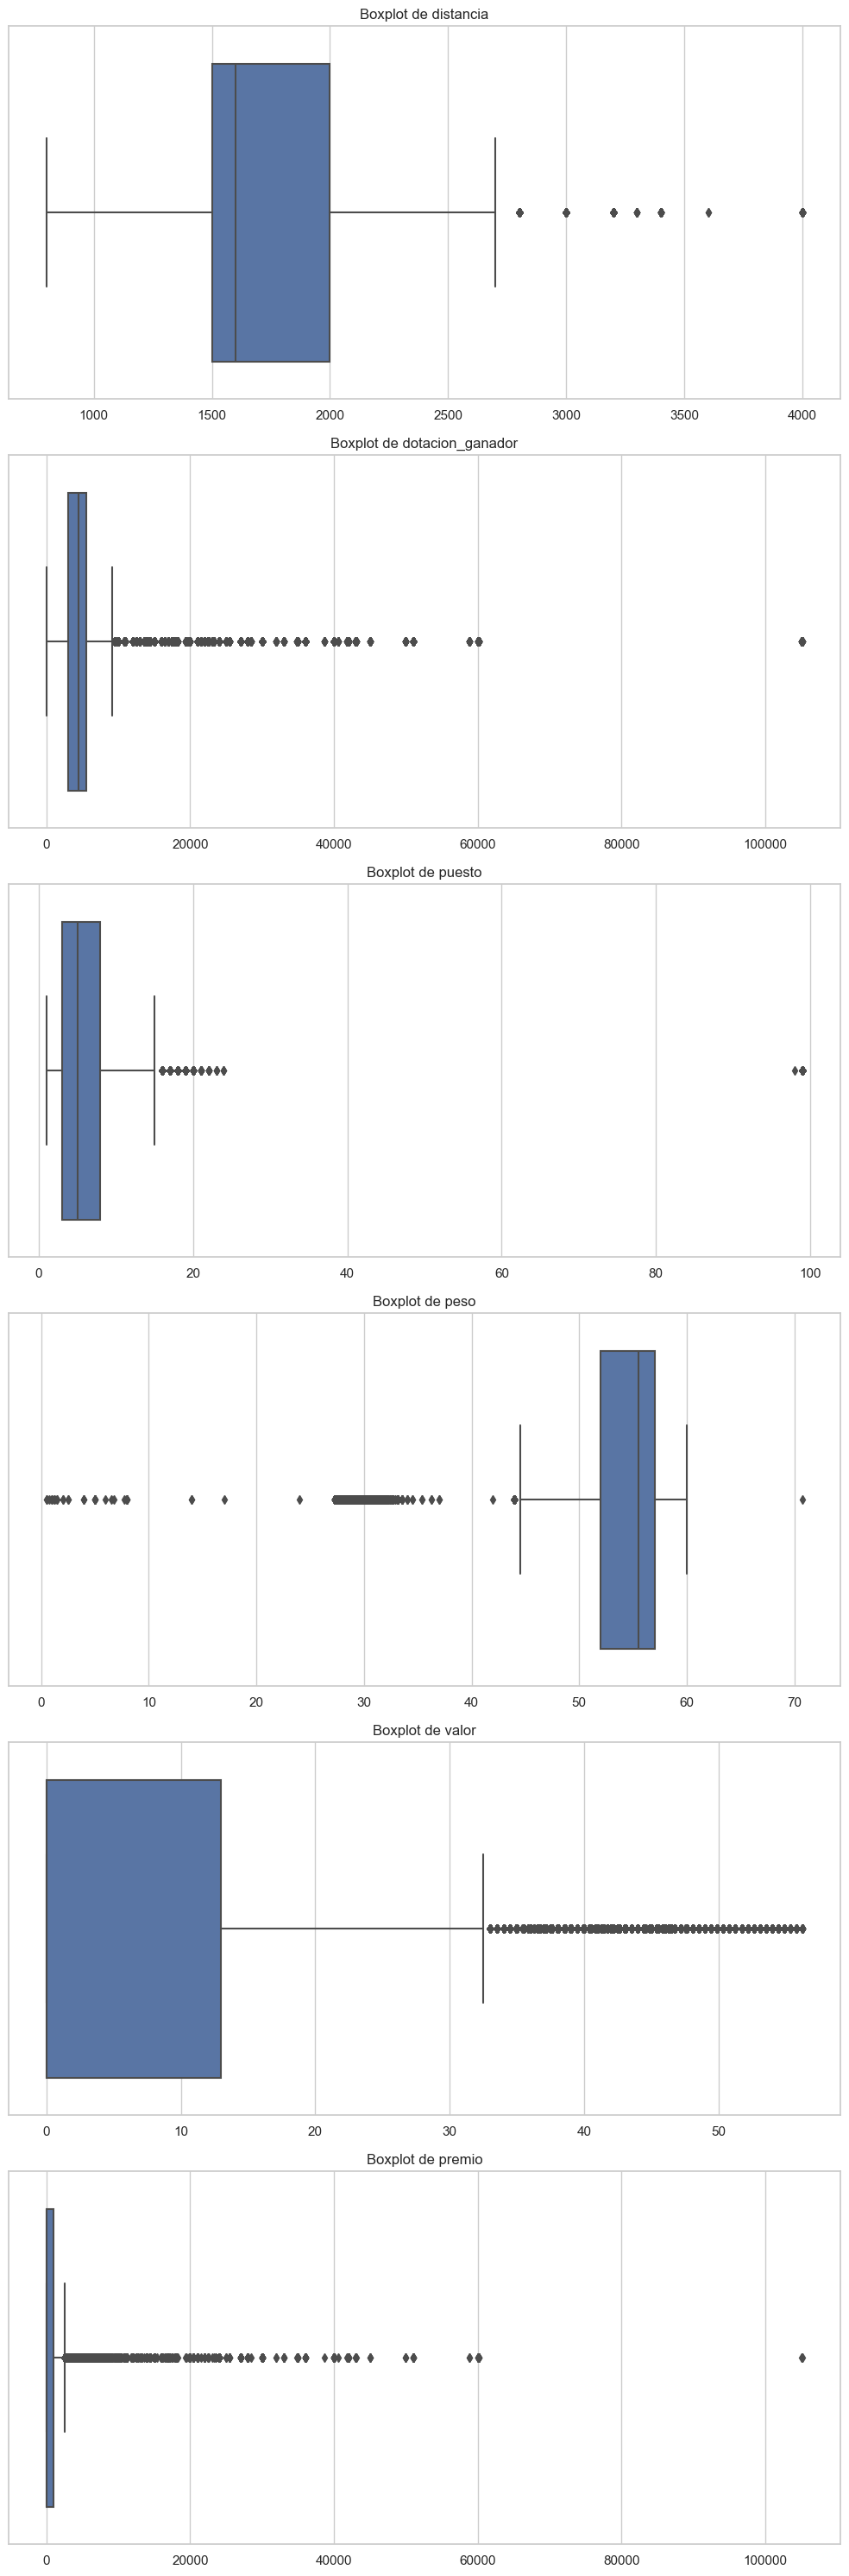

In [63]:
# Definir las columnas numéricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Crear subplots para cada variable numérica
num_plots = len(columnas_numericas)
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

# Iterar sobre las columnas numéricas y crear boxplots
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot de {col}')
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()